In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 # to load in images
%matplotlib inline

In [81]:
ae = tf.keras.models.load_model('./best_7-25.h5')

In [82]:
encoder = tf.keras.models.Model(inputs=ae.input, outputs=ae.get_layer(name='encoder_output').output)

(4208, 2368, 3)

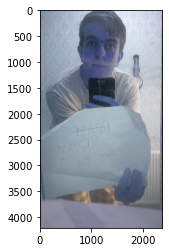

In [101]:
img = cv2.imread('./faces/4rbve6.png')
plt.imshow(img)
img.shape

In [93]:
haar_cascade_face = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')

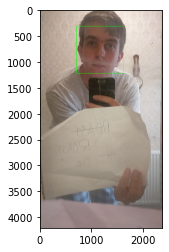

In [100]:
def detect_faces(img, extension=(0,0)):
    img_gray = img.copy()
    faces_rects = haar_cascade_face.detectMultiScale(img_gray, scaleFactor = 1.2, minNeighbors = 5)
    for (x,y,w,h) in faces_rects:
        left_x = max(x-extension/2,0)
        right_x = min(x+extension/2,len(img[0]))
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
    return img

def cutout_face(img):
    img_gray = img.copy()
    faces_rects = haar_cascade_face.detectMultiScale(img_gray, scaleFactor = 1.2, minNeighbors = 5)
    if len(faces_rects)>0:
        x,y,w,h = faces_rects[0]
        
plt.imshow(cv2.cvtColor(detect_faces(img), cv2.COLOR_BGR2RGB))

In [84]:
def encode_vals(img):
    img = img / 255.
    img = img.reshape((1, 256, 256, 3))
    return encoder.predict(img)[0]

def autoencoder_predict(img):
    img = img / 255.
    img = img.reshape((1, 256, 256, 3))
    return ae.predict(img)[0]

In [85]:
encode_vals(img)

array([-1.65196753e+00,  1.98350713e-01, -5.79778552e-01,  1.05328150e-01,
       -5.85634351e-01, -1.82056829e-01, -1.07548594e+00,  2.64904523e+00,
       -6.41261339e-01, -6.86682940e-01, -1.38406348e+00,  5.74442208e-01,
        5.79410017e-01, -1.09012651e+00, -7.50689745e-01,  1.30602896e+00,
        1.86008736e-02,  8.47957671e-01, -1.06889844e+00, -5.56422114e-01,
        1.24951780e+00, -3.92879963e-01,  7.46678561e-04,  1.02975404e+00,
        4.95415151e-01,  2.65946180e-01, -1.12298179e+00,  8.27951133e-01,
        1.12363890e-01,  1.61098850e+00, -6.54230535e-01, -7.04063103e-02,
       -1.98425329e+00, -1.04205990e+00, -9.00472999e-01,  2.58136362e-01,
       -2.03621656e-01, -9.99261916e-01, -8.88522744e-01,  9.40589532e-02,
        1.58337951e-01,  3.91548753e-01, -5.22116065e-01,  6.05075538e-01,
        3.36781979e-01,  1.12384129e+00, -3.08251292e-01,  1.31707323e+00,
        8.01965237e-01,  2.22881883e-01, -5.01820505e-01,  2.59641856e-01,
       -1.70415834e-01,  

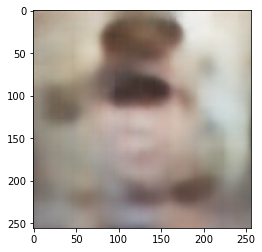

In [86]:
plt.imshow(autoencoder_predict(img))